# Ensemble methods. Exercises


In this section we have only one exercise:

1. Find the best three classifier in the stacking method using the classifiers from scikit-learn package, such as:


* Linear regression,
* Nearest Neighbors,
* Linear SVM,
* Decision Tree,
* Naive Bayes,
* QDA.

In [1]:
%store -r data_set
%store -r labels
%store -r test_data_set
%store -r test_labels
%store -r unique_labels

## Exercise 1: Find the best three classifier in the stacking method

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [15]:
used_cl_list = [KNeighborsClassifier, DecisionTreeClassifier, GaussianNB, QuadraticDiscriminantAnalysis, SVC, LinearRegression]
def build_classifiers():
    classifiers = []
    classifiers.append(KNeighborsClassifier())
    classifiers.append(DecisionTreeClassifier())
    classifiers.append(GaussianNB())
    classifiers.append(QuadraticDiscriminantAnalysis())
    classifiers.append(SVC(gamma='auto'))
    classifiers.append(LinearRegression())
    return classifiers
    #return [classifier() for classifier in used_cl_list]

In [16]:
def build_stacked_classifier(classifiers, st_cl):
    output = []
    fitted_classifiers = [cl.fit(data_set, labels) for cl in classifiers]
    for classifier in fitted_classifiers:
        output.append(classifier.predict(data_set))
    output = np.array(output).reshape((130,len(classifiers)))
    
    stacked_classifier = st_cl
    stacked_classifier.fit(output.reshape((130,len(classifiers))), labels.reshape((130,)))
    test_set = []
    for classifier in fitted_classifiers:
        test_set.append(classifier.predict(test_data_set))
    test_set = np.array(test_set).reshape((len(test_set[0]),len(classifiers)))
    predicted = stacked_classifier.predict(test_set)
    #if stacked_classifier.__class__.__name__ == 'LinearRegression':
    #print('stacked classifier name: ', st_cl.__class__.__name__)
        #print('predicted:\n', predicted, '\n')
    return predicted

In [5]:
predicted = []
classifiers = build_classifiers()
classifiers_batches = []
for fst_idx in range(len(used_cl_list)):
    for scd_idx in range(len(used_cl_list)):
        if scd_idx < fst_idx:
            continue
        for thd_idx in range(len(used_cl_list)):
            if fst_idx == scd_idx or scd_idx == thd_idx or thd_idx == fst_idx or classifiers[thd_idx].__class__.__name__ == 'LinearRegression':
                continue
            classifiers_batches.append([classifiers[fst_idx], classifiers[scd_idx], classifiers[thd_idx]])
print( len(classifiers_batches) )

for batch in classifiers_batches:
    predicted.append(build_stacked_classifier(batch[:-1], batch[-1]))

50


C:\MyFiles\anaconda\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\MyFiles\anaconda\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\MyFiles\anaconda\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\MyFiles\anaconda\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [6]:
accuracy = accuracy_score(test_labels, predicted[0])
accuracies_list = [accuracy_score(test_labels, prediction) for prediction in predicted]
for idx, acc in enumerate(accuracies_list):
    if acc == np.max(accuracies_list):
        fst_cl_name = classifiers_batches[idx][0].__class__.__name__
        scd_cl_name = classifiers_batches[idx][1].__class__.__name__
        thd_cl_name = classifiers_batches[idx][2].__class__.__name__
        print('Accuracy -> ', acc, ' for classifiers batch -> ', fst_cl_name,' ',scd_cl_name,' ', thd_cl_name)

Accuracy ->  1.0  for classifiers batch ->  KNeighborsClassifier   DecisionTreeClassifier   GaussianNB
Accuracy ->  1.0  for classifiers batch ->  KNeighborsClassifier   DecisionTreeClassifier   QuadraticDiscriminantAnalysis
Accuracy ->  1.0  for classifiers batch ->  KNeighborsClassifier   GaussianNB   SVC
Accuracy ->  1.0  for classifiers batch ->  KNeighborsClassifier   QuadraticDiscriminantAnalysis   GaussianNB
Accuracy ->  1.0  for classifiers batch ->  KNeighborsClassifier   QuadraticDiscriminantAnalysis   SVC
Accuracy ->  1.0  for classifiers batch ->  KNeighborsClassifier   SVC   GaussianNB
Accuracy ->  1.0  for classifiers batch ->  KNeighborsClassifier   LinearRegression   GaussianNB
Accuracy ->  1.0  for classifiers batch ->  DecisionTreeClassifier   QuadraticDiscriminantAnalysis   GaussianNB
Accuracy ->  1.0  for classifiers batch ->  DecisionTreeClassifier   QuadraticDiscriminantAnalysis   SVC
Accuracy ->  1.0  for classifiers batch ->  DecisionTreeClassifier   SVC   Gauss

## Exercise 2: 

Use the boosting method and change the code to fullfilt the following requirements:

* the weights should be calculated as:
$w_{n}^{(t+1)}=\frac{1+ I(y_{n}\neq h_{t}(x_{n}))}{\sum_{i=1}^{N}1+I(y_{n}\neq h_{t}(x_{n}))}$,
* the prediction is done with a voting method.

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# prepare data set
#I - calculate the accuracy vector

def generate_data(sample_number, feature_number, label_number):
    data_set = np.random.random_sample((sample_number, feature_number))
    labels = np.random.choice(label_number, sample_number)
    return data_set, labels

labels = 2
dimension = 2
test_set_size = 1000
train_set_size = 5000
train_set, train_labels = generate_data(train_set_size, dimension, labels)
test_set, test_labels = generate_data(test_set_size, dimension, labels)

# init weights
number_of_iterations = 10
weights = np.ones((test_set_size,)) / test_set_size


def train_model(classifier, weights):
    return classifier.fit(X=test_set, y=test_labels, sample_weight=weights)

def calculate_error(model):
    predicted = model.predict(test_set)
    I=calculate_accuracy_vector(predicted, test_labels)
    Z=np.sum(I)
    return (1+Z)/1.0

def calculate_accuracy_vector(predicted, test_labels):
    I = np.zeros(len(test_labels))
    for idx, prediction in enumerate(predicted):
        if prediction == test_labels[idx]:
            I[idx] = 1
    return I 

Fill the two functions below:

In [4]:
def set_new_weights(model):
    predicted = model.predict(test_set)
    return (np.ones(test_set_size)+calculate_accuracy_vector(predicted,test_labels))/sum(np.ones(test_set_size)+calculate_accuracy_vector(predicted,test_labels))

Train the classifier with the code below:

In [5]:
classifier = DecisionTreeClassifier(max_depth=1, random_state=1)
classifier.fit(X=test_set, y=test_labels)
alphas = []
classifiers = []
for iteration in range(number_of_iterations):
    model = train_model(classifier, weights)
    weights = set_new_weights(model)
    classifiers.append(model)


In [6]:
#calculate_error(train_model(classifier, weights))

Set the validation data set:

In [8]:
validate_x, validate_label = generate_data(1, dimension, labels)

Fill the prediction code:

In [9]:
def get_prediction(x):
    prediction_matrix = [classifier.predict(x) for classifier in classifiers] 
    if sum(prediction_matrix) <= number_of_iterations/2:
        return 0
    else:
        return 1

Test it:

[0.45, 0.7, 0.45, 0.55, 0.65, 0.4, 0.75, 0.5, 0.45, 0.5, 0.5, 0.75, 0.4, 0.45, 0.35, 0.45, 0.5, 0.5, 0.6, 0.25, 0.5, 0.55, 0.45, 0.6, 0.5, 0.65, 0.6, 0.55, 0.55, 0.5, 0.5, 0.55, 0.55, 0.4, 0.6, 0.4, 0.35, 0.65, 0.75, 0.45, 0.4, 0.45, 0.75, 0.35, 0.5, 0.55, 0.45, 0.6, 0.45, 0.65, 0.45, 0.25, 0.5, 0.4, 0.7, 0.45, 0.5, 0.55, 0.6, 0.3, 0.55, 0.45, 0.6, 0.45, 0.4, 0.7, 0.5, 0.4, 0.6, 0.45, 0.65, 0.6, 0.45, 0.35, 0.35, 0.5, 0.55, 0.3, 0.45, 0.6, 0.45, 0.4, 0.65, 0.5, 0.45, 0.45, 0.45, 0.55, 0.5, 0.45, 0.5, 0.5, 0.65, 0.6, 0.55, 0.35, 0.55, 0.65, 0.55, 0.6]


[]

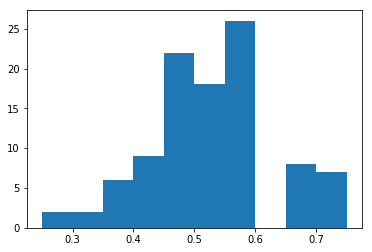

In [18]:
accuracies = []
for j in range(100):
    pred = []
    val_labels = []
    for i in range(20):
        validate_x, validate_label = generate_data(1, dimension, labels)
        prediction = get_prediction(validate_x)
        pred.append(prediction)
        val_labels.append(validate_label)
    acc = accuracy_score(pred, val_labels)
    accuracies.append(acc)

print(accuracies)
plt.hist(accuracies) 
plt.plot()
#Is there any sense in the random generated datasets+labels?